# Building Stock Indices

Note: __yfinance is currently unstable/unreliable__ when it comes to downloading fundamental data with the ticker object. In particular, __ticker.info()__ is flawed.

__Action required__: Check for the __latest yfinance versions__ and update with the following command (Anaconda Prompt / Terminal):

pip install yfinance --upgrade

In the following, I have added an __alternative Yahoo Finance API Wrapper__, which is more stable/reliable: __yahooquery__

__Action required: Please install yahooquery with the following command (Anaconda Prompt / Terminal):__

pip install yahooquery

---

---

---

---

---

# Investment Strategies, Indices, Portfolios & Benchmarks

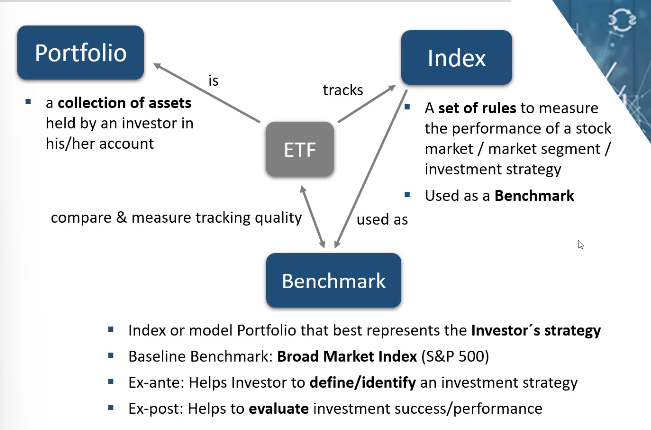

__There is 3 investment strategies__:
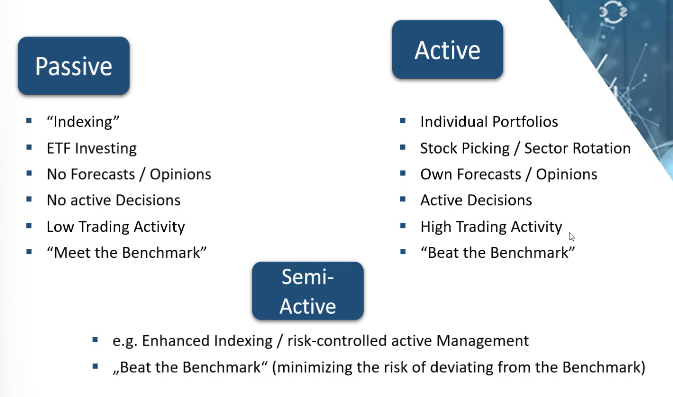

# What is Financial Index ? 
__Example of indexes__:
- S&O 500
- Dow Jones
- NASDAQ
- DAX 40 

And so on... 

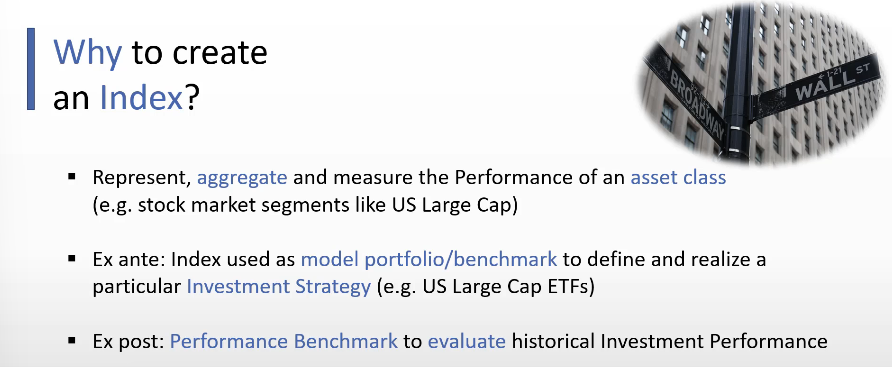

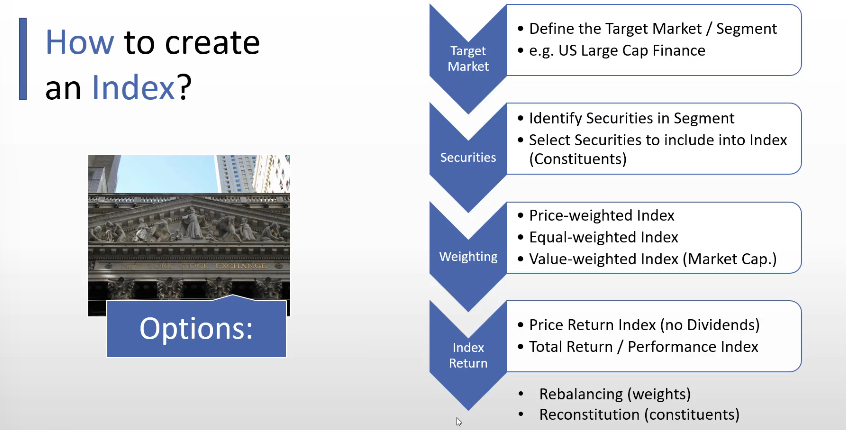

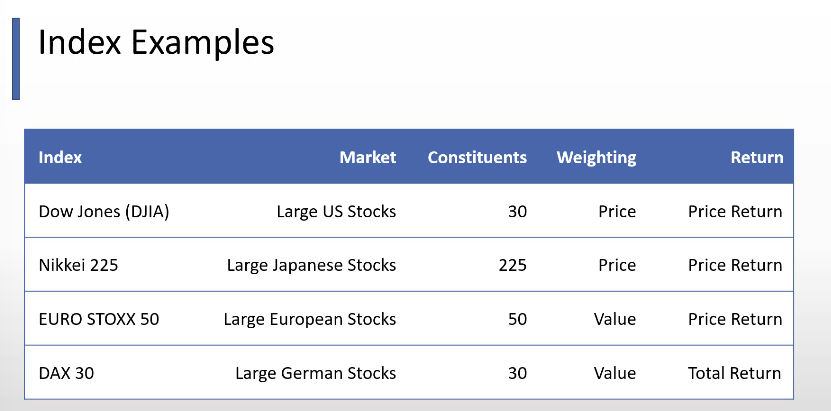

---

# Getting started

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv("DJI_Const.csv", header = [0, 1], index_col = 0, parse_dates=[0])
df

Adj Close                                                         \
                AAPL   AMGN    AXP     BA    CAT    CRM  CSCO    CVX    DIS   
Date                                                                          
2020-08-31    127.29 238.22  98.72 171.82 135.37 272.65 39.41  76.45 131.87   
2020-09-01    132.36 235.90  99.58 172.10 138.93 281.25 39.23  75.67 133.55   
2020-09-02    129.62 242.73 101.45 174.78 141.99 276.69 39.59  75.77 135.39   
2020-09-03    119.24 233.13 101.51 168.77 139.60 265.01 38.22  74.94 133.24   
2020-09-04    119.32 233.59 102.69 171.05 140.95 254.70 38.10  74.63 131.99   
...              ...    ...    ...    ...    ...    ...   ...    ...    ...   
2022-11-09    134.87 289.65 145.86 168.74 225.54 142.06 43.91 177.93  86.75   
2022-11-10    146.87 291.01 154.75 177.58 232.45 156.30 45.66 181.30  90.46   
2022-11-11    149.70 285.02 154.89 177.49 236.49 157.73 44.79 186.46  95.01   
2022-11-14    148.28 285.30 154.13 173.55 236.50 158.66 44.74 186.55  94.28   
2022-11-15    150.04 283.60 153.89 175.35 234.59 162.07 44.90 188.05  95.51   

                  ...    Volume                                       \
             DOW  ...      MSFT       NKE       PG      TRV      UNH   
Date              ...                                                  
2020-08-31 41.15  ...  28774200   3519800  5596800  2297900  4341600   
2020-09-01 43.11  ...  25725500   4912400  5671800   969900  2487100   
2020-09-02 44.89  ...  34080800   6775400  8384800  1391400  2846500   
2020-09-03 44.13  ...  58400300   7264400  7277900  1299400  3872500   
2020-09-04 44.32  ...  59664100   5157600  7437700  1460700  2901000   
...          ...  ...       ...       ...      ...      ...      ...   
2022-11-09 47.68  ...  27852900   6550900  5690700   999200  2672600   
2022-11-10 49.96  ...  46268000   9361000  8068700  1618000  3426400   
2022-11-11 53.14  ...  34600900  12595600  7174400  1403300  7032900   
2022-11-14 51.95  ...  31123300   7134900  8516200  1427300  5238400   
2022-11-15 51.60  ...  31367300   7241000  7731700  1445900  5102800   

                                                               
                   V        VZ       WBA       WMT       ^DJI  
Date                                                           
2020-08-31   9326900  14555500   7940100  15078800  517320000  
2020-09-01   5642900  13358400  10728300  35599400  423410000  
2020-09-02   9863800  21711900   7672400  17222000  539510000  
2020-09-03  11310200  23126800   8278000  16005000  650080000  
2020-09-04  13243600  22250100   6994400  11327400  694640000  
...              ...       ...       ...       ...        ...  
2022-11-09   7320200  17574600   6830500   5310700  355200000  
2022-11-10   8048900  23049000   8825000   6770200  480130000  
2022-11-11   9600700  22978900  13098600   6419700  427790000  
2022-11-14   5796100  23028500   8301900  12508600  354340000  
2022-11-15   7315700  25058900   6755300  25504700  390610000  

[558 rows x 186 columns]

In [4]:
df.dropna(inplace = True)
df

Adj Close                                                         \
                AAPL   AMGN    AXP     BA    CAT    CRM  CSCO    CVX    DIS   
Date                                                                          
2020-08-31    127.29 238.22  98.72 171.82 135.37 272.65 39.41  76.45 131.87   
2020-09-01    132.36 235.90  99.58 172.10 138.93 281.25 39.23  75.67 133.55   
2020-09-02    129.62 242.73 101.45 174.78 141.99 276.69 39.59  75.77 135.39   
2020-09-03    119.24 233.13 101.51 168.77 139.60 265.01 38.22  74.94 133.24   
2020-09-04    119.32 233.59 102.69 171.05 140.95 254.70 38.10  74.63 131.99   
...              ...    ...    ...    ...    ...    ...   ...    ...    ...   
2022-11-09    134.87 289.65 145.86 168.74 225.54 142.06 43.91 177.93  86.75   
2022-11-10    146.87 291.01 154.75 177.58 232.45 156.30 45.66 181.30  90.46   
2022-11-11    149.70 285.02 154.89 177.49 236.49 157.73 44.79 186.46  95.01   
2022-11-14    148.28 285.30 154.13 173.55 236.50 158.66 44.74 186.55  94.28   
2022-11-15    150.04 283.60 153.89 175.35 234.59 162.07 44.90 188.05  95.51   

                  ...    Volume                                       \
             DOW  ...      MSFT       NKE       PG      TRV      UNH   
Date              ...                                                  
2020-08-31 41.15  ...  28774200   3519800  5596800  2297900  4341600   
2020-09-01 43.11  ...  25725500   4912400  5671800   969900  2487100   
2020-09-02 44.89  ...  34080800   6775400  8384800  1391400  2846500   
2020-09-03 44.13  ...  58400300   7264400  7277900  1299400  3872500   
2020-09-04 44.32  ...  59664100   5157600  7437700  1460700  2901000   
...          ...  ...       ...       ...      ...      ...      ...   
2022-11-09 47.68  ...  27852900   6550900  5690700   999200  2672600   
2022-11-10 49.96  ...  46268000   9361000  8068700  1618000  3426400   
2022-11-11 53.14  ...  34600900  12595600  7174400  1403300  7032900   
2022-11-14 51.95  ...  31123300   7134900  8516200  1427300  5238400   
2022-11-15 51.60  ...  31367300   7241000  7731700  1445900  5102800   

                                                               
                   V        VZ       WBA       WMT       ^DJI  
Date                                                           
2020-08-31   9326900  14555500   7940100  15078800  517320000  
2020-09-01   5642900  13358400  10728300  35599400  423410000  
2020-09-02   9863800  21711900   7672400  17222000  539510000  
2020-09-03  11310200  23126800   8278000  16005000  650080000  
2020-09-04  13243600  22250100   6994400  11327400  694640000  
...              ...       ...       ...       ...        ...  
2022-11-09   7320200  17574600   6830500   5310700  355200000  
2022-11-10   8048900  23049000   8825000   6770200  480130000  
2022-11-11   9600700  22978900  13098600   6419700  427790000  
2022-11-14   5796100  23028500   8301900  12508600  354340000  
2022-11-15   7315700  25058900   6755300  25504700  390610000  

[558 rows x 186 columns]

In [5]:
close = df.Close.copy()
close

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,253.32,101.59,171.82,142.31,272.65,42.22,83.93,131.87,45.12,...,225.53,111.89,138.33,116.04,312.55,211.99,59.27,38.02,138.85,28430.05
2020-09-01,134.18,250.86,102.47,172.10,146.05,281.25,42.03,83.08,133.55,47.27,...,227.27,114.84,138.18,114.69,312.83,213.35,59.16,36.76,147.59,28645.66
2020-09-02,131.40,258.12,104.40,174.78,149.27,276.69,42.42,83.19,135.39,49.22,...,231.65,116.80,140.51,117.48,320.24,216.48,60.53,37.17,147.68,29100.50
2020-09-03,120.88,247.91,104.46,168.77,146.76,265.01,40.95,82.28,133.24,48.39,...,217.30,112.85,138.26,115.35,316.23,208.96,60.61,37.09,144.54,28292.73
2020-09-04,120.96,248.40,105.67,171.05,148.18,254.70,40.82,81.93,131.99,48.60,...,214.25,112.40,137.96,116.57,312.00,204.66,60.48,36.89,142.83,28133.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,134.87,289.65,145.86,168.74,225.54,142.06,43.91,177.93,86.75,47.68,...,224.51,92.10,136.48,182.15,540.66,193.93,37.62,36.89,139.47,32513.94
2022-11-10,146.87,291.01,154.75,177.58,232.45,156.30,45.66,181.30,90.46,49.96,...,242.98,99.49,141.18,183.30,544.17,205.57,38.52,38.49,142.36,33715.37
2022-11-11,149.70,285.02,154.89,177.49,236.49,157.73,44.79,186.46,95.01,53.14,...,247.11,106.09,140.97,181.73,522.08,205.00,38.30,41.26,142.58,33747.86


In [6]:
returns = close.pct_change() # simple returns
returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.04,-0.01,0.01,0.00,0.03,0.03,-0.00,-0.01,0.01,0.05,...,0.01,0.03,-0.00,-0.01,0.00,0.01,-0.00,-0.03,0.06,0.01
2020-09-02,-0.02,0.03,0.02,0.02,0.02,-0.02,0.01,0.00,0.01,0.04,...,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.00,0.02
2020-09-03,-0.08,-0.04,0.00,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.02,...,-0.06,-0.03,-0.02,-0.02,-0.01,-0.03,0.00,-0.00,-0.02,-0.03
2020-09-04,0.00,0.00,0.01,0.01,0.01,-0.04,-0.00,-0.00,-0.01,0.00,...,-0.01,-0.00,-0.00,0.01,-0.01,-0.02,-0.00,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.03,-0.01,-0.03,-0.01,-0.02,-0.03,-0.02,-0.04,-0.13,-0.04,...,-0.02,-0.02,-0.00,-0.01,-0.02,-0.04,-0.01,-0.04,-0.02,-0.02
2022-11-10,0.09,0.00,0.06,0.05,0.03,0.10,0.04,0.02,0.04,0.05,...,0.08,0.08,0.03,0.01,0.01,0.06,0.02,0.04,0.02,0.04
2022-11-11,0.02,-0.02,0.00,-0.00,0.02,0.01,-0.02,0.03,0.05,0.06,...,0.02,0.07,-0.00,-0.01,-0.04,-0.00,-0.01,0.07,0.00,0.00


In [7]:
index = "^DJI"

In [8]:
const = close.columns.drop([index])
const

Index(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW',
       'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT'],
      dtype='object')

---

# Building a pwi (Price-weighted Index)

> **Building the Dow Jones Industrial Average Index from scratch**

In [9]:
# See the  peice of the instuments
close[const]

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,253.32,101.59,171.82,142.31,272.65,42.22,83.93,131.87,45.12,...,81.36,225.53,111.89,138.33,116.04,312.55,211.99,59.27,38.02,138.85
2020-09-01,134.18,250.86,102.47,172.10,146.05,281.25,42.03,83.08,133.55,47.27,...,80.56,227.27,114.84,138.18,114.69,312.83,213.35,59.16,36.76,147.59
2020-09-02,131.40,258.12,104.40,174.78,149.27,276.69,42.42,83.19,135.39,49.22,...,82.95,231.65,116.80,140.51,117.48,320.24,216.48,60.53,37.17,147.68
2020-09-03,120.88,247.91,104.46,168.77,146.76,265.01,40.95,82.28,133.24,48.39,...,81.57,217.30,112.85,138.26,115.35,316.23,208.96,60.61,37.09,144.54
2020-09-04,120.96,248.40,105.67,171.05,148.18,254.70,40.82,81.93,131.99,48.60,...,81.34,214.25,112.40,137.96,116.57,312.00,204.66,60.48,36.89,142.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,134.87,289.65,145.86,168.74,225.54,142.06,43.91,177.93,86.75,47.68,...,101.59,224.51,92.10,136.48,182.15,540.66,193.93,37.62,36.89,139.47
2022-11-10,146.87,291.01,154.75,177.58,232.45,156.30,45.66,181.30,90.46,49.96,...,101.89,242.98,99.49,141.18,183.30,544.17,205.57,38.52,38.49,142.36
2022-11-11,149.70,285.02,154.89,177.49,236.49,157.73,44.79,186.46,95.01,53.14,...,97.96,247.11,106.09,140.97,181.73,522.08,205.00,38.30,41.26,142.58


In [10]:
# sum of prices (the price of a share) day 1 of all instruments. 
close[const].sum(axis = 1)[0] 

C:\Users\97250\AppData\Local\Temp\ipykernel_25144\4254618029.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  close[const].sum(axis = 1)[0]


4311.67170715332

__Index (Base Value = 100)__

In [13]:
# pwi = price weigted index 

# So what we do here?
# - we sum the price of each stock (sum each row that contaon the stock prices)
# - then, we divide each sum row with with the first row (when we create the index)
# - then. we multiply each row by 100. (normalize to be base of 100)
pwi = close[const].sum(axis = 1).div(close[const].sum(axis = 1)[0]).mul(100)
pwi


## Interpretation ##
# 2020-08-31   100.00 -> this is the first day that we have create the index.
# 2022-11-15   118.21 -> this is the end day, and we can see that our portfolio
#                        increase in 18.21%!  


# So.. That's the way to create Price Weigte Index! (PWI)

C:\Users\97250\AppData\Local\Temp\ipykernel_25144\1722626626.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pwi = close[const].sum(axis = 1).div(close[const].sum(axis = 1)[0]).mul(100)


Date
2020-08-31   100.00
2020-09-01   100.76
2020-09-02   102.36
2020-09-03    99.51
2020-09-04    98.96
              ...  
2022-11-09   114.42
2022-11-10   118.64
2022-11-11   118.76
2022-11-14   118.02
2022-11-15   118.21
Length: 558, dtype: float64

In [14]:
pwi.name = "pwi"
pwi

Date
2020-08-31   100.00
2020-09-01   100.76
2020-09-02   102.36
2020-09-03    99.51
2020-09-04    98.96
              ...  
2022-11-09   114.42
2022-11-10   118.64
2022-11-11   118.76
2022-11-14   118.02
2022-11-15   118.21
Name: pwi, Length: 558, dtype: float64

__Cross-Check with DJI Data__

In [16]:
# ofcurse that it will be the same. 
# we normalize the ^DJI index to  base 100. 
# so you can see the cumelative return of the portfolio. 
dji_norm = close["^DJI"].div(close["^DJI"][0]).mul(100)
dji_norm

C:\Users\97250\AppData\Local\Temp\ipykernel_25144\2297957900.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dji_norm = close["^DJI"].div(close["^DJI"][0]).mul(100)


Date
2020-08-31   100.00
2020-09-01   100.76
2020-09-02   102.36
2020-09-03    99.52
2020-09-04    98.96
              ...  
2022-11-09   114.36
2022-11-10   118.59
2022-11-11   118.70
2022-11-14   117.96
2022-11-15   118.16
Name: ^DJI, Length: 558, dtype: float64

__Comparte our `PWI` with `^DJI`__
- Its the same ofcurse. 
- the ^DJI is Price Weigted Index. 

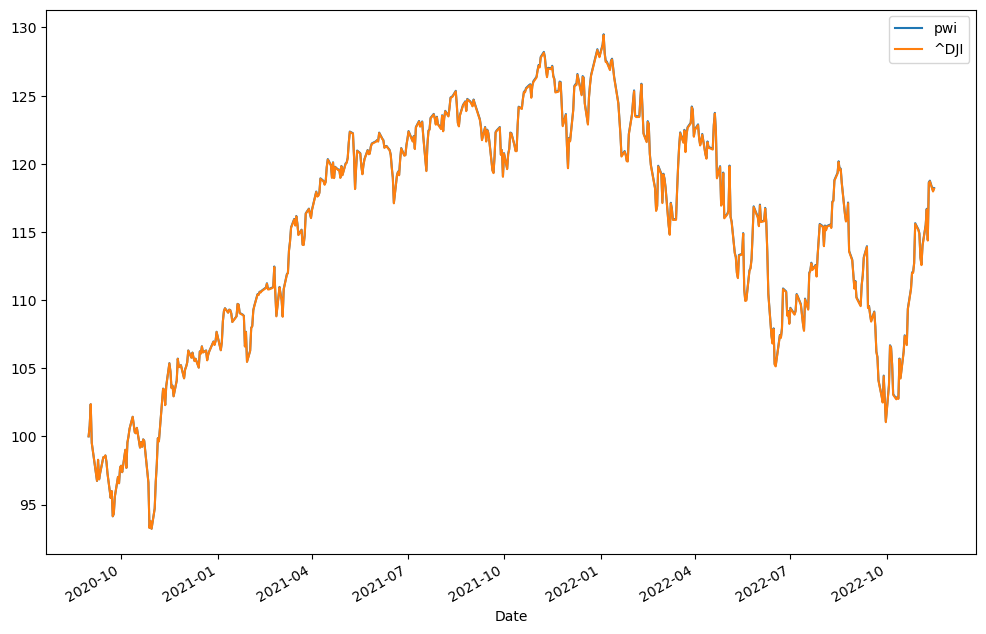

In [17]:
pwi.plot(figsize = (12, 8))
dji_norm.plot()
plt.legend()
plt.show()

__Weights over time__
- What are the weights of the constituents over the time?  

> __which instrument from our PWI performe as well?__

In [18]:
# All we need to do is:
# Divide each instument be the sum of the other intriments (on the same row (day)!!)  
weights_PWI = close[const].div(close[const].sum(axis = 1), axis = "rows")
weights_PWI 

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.03,0.06,0.02,0.04,0.03,0.06,0.01,0.02,0.03,0.01,...,0.02,0.05,0.03,0.03,0.03,0.07,0.05,0.01,0.01,0.03
2020-09-01,0.03,0.06,0.02,0.04,0.03,0.06,0.01,0.02,0.03,0.01,...,0.02,0.05,0.03,0.03,0.03,0.07,0.05,0.01,0.01,0.03
2020-09-02,0.03,0.06,0.02,0.04,0.03,0.06,0.01,0.02,0.03,0.01,...,0.02,0.05,0.03,0.03,0.03,0.07,0.05,0.01,0.01,0.03
2020-09-03,0.03,0.06,0.02,0.04,0.03,0.06,0.01,0.02,0.03,0.01,...,0.02,0.05,0.03,0.03,0.03,0.07,0.05,0.01,0.01,0.03
2020-09-04,0.03,0.06,0.02,0.04,0.03,0.06,0.01,0.02,0.03,0.01,...,0.02,0.05,0.03,0.03,0.03,0.07,0.05,0.01,0.01,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.03,0.06,0.03,0.03,0.05,0.03,0.01,0.04,0.02,0.01,...,0.02,0.05,0.02,0.03,0.04,0.11,0.04,0.01,0.01,0.03
2022-11-10,0.03,0.06,0.03,0.03,0.05,0.03,0.01,0.04,0.02,0.01,...,0.02,0.05,0.02,0.03,0.04,0.11,0.04,0.01,0.01,0.03
2022-11-11,0.03,0.06,0.03,0.03,0.05,0.03,0.01,0.04,0.02,0.01,...,0.02,0.05,0.02,0.03,0.04,0.10,0.04,0.01,0.01,0.03


__Plot the `weights` of the constituents over the time!__

 
> In a **`price-weighted index`**, the weights of each instrument can change over time. The weight of each stock in the index is **proportional** to its price **relative to the total prices of all the stocks in the index**.

> When the price of a stock in a **`price-weighted index`** changes, it **directly affects the index value!**. If the price of a higher-priced stock increases or decreases more significantly than the prices of other stocks in the index, **it will have a larger impact on the overall index value**.


__`So depend if the price increase or decrease, also the weigths should increase of decrease`__

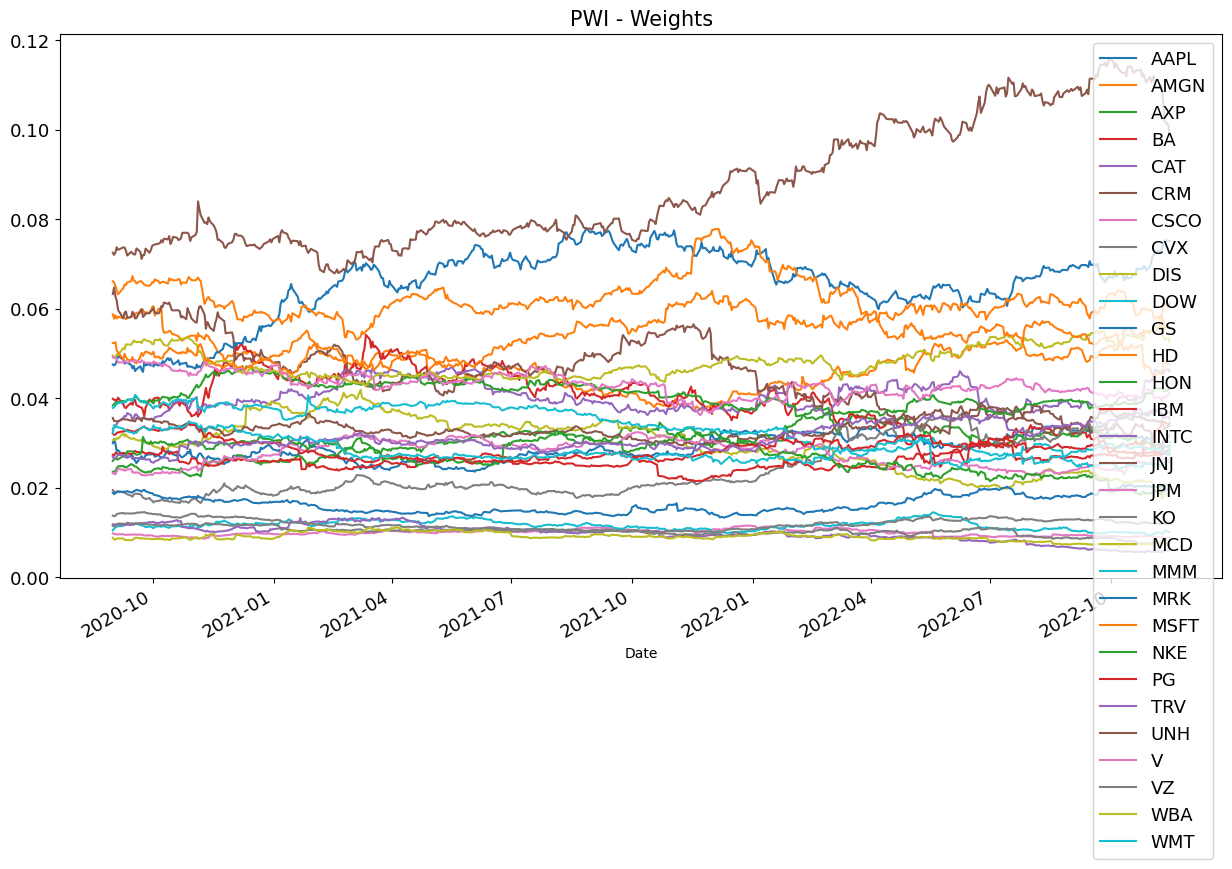

In [19]:
weights_PWI.plot(figsize = (15, 8), fontsize = 13)
plt.title("PWI - Weights", fontsize = 15)
plt.legend(fontsize = 13)
plt.show()

__Let's plot the weigths of two importent instruments__
- We can see that most those instruments are hold in relative big weigts compare to each otder, and __this is because their price!__
    - The currect weights of `MSFT` is 5% (its mean that take 5% from our portfilio) 
    - And the current weigth of `AAPL` is someting like 3%. 

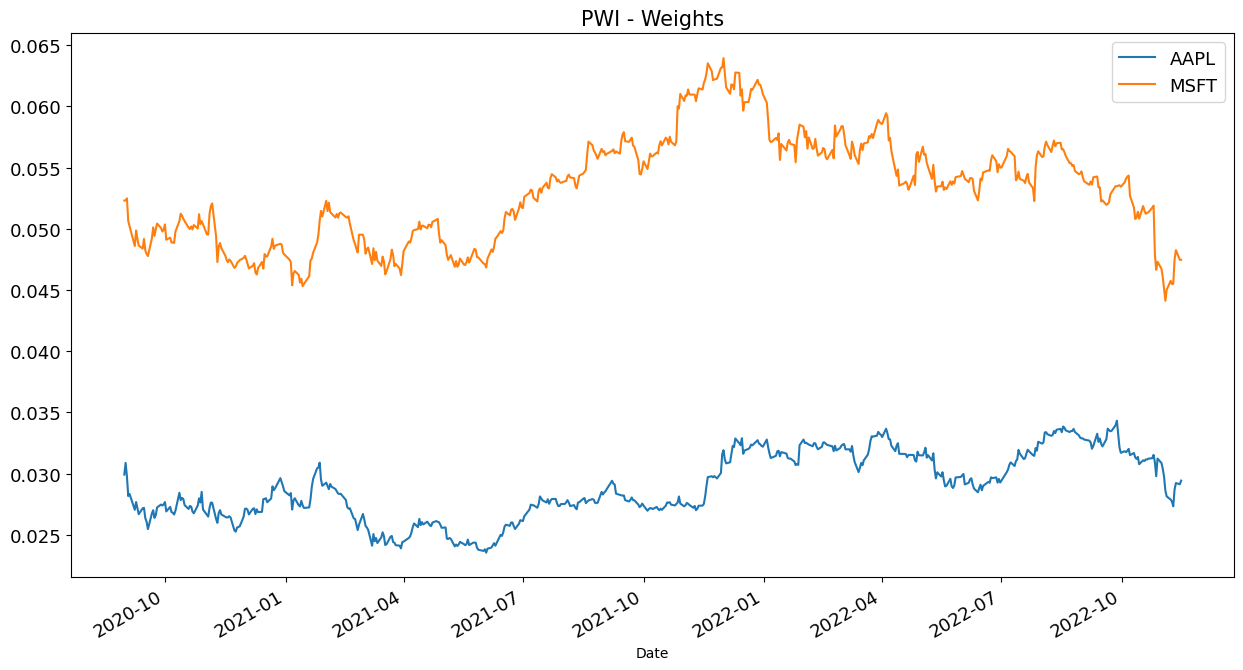

In [16]:

weights_PWI[["AAPL", "MSFT"]].plot(figsize = (15, 8), fontsize = 13)
plt.title("PWI - Weights", fontsize = 15)
plt.legend(fontsize = 13)
plt.show()

---

#  Equal-Weighted Index - Theory



>  __An equal-weighted index is a type of stock market index in which all components, regardless of their individual market capitalizations or stock prices, are assigned the same weight. In other words, each stock in the index contributes equally to the index's overall performance.__

__Here's how an equal-weighted index typically works:__

- __Equal Allocation:__ In an equal-weighted index, each stock is given the same percentage or weight in the index, regardless of its market capitalization. For example, if there are 10 stocks in the index, each stock might be assigned a weight of 10%.

- __Regular Rebalancing:__ To maintain equal weights, the index is regularly rebalanced. This means that the weights are adjusted periodically, often on a quarterly or annual basis, to bring them back to the equal allocation.

- __Performance Impact:__ The performance of an equal-weighted index is driven by the overall performance of all its components. It does not favor larger companies over smaller ones, as each stock has an equal influence on the index's value.

- __Differences from Cap-Weighted Indices:__ This is in contrast to market capitalization-weighted indices, where stocks with higher market capitalizations have higher weights in the index. In an equal-weighted index, the impact of each stock on the index's value is the same, regardless of its market capitalization.

- __Sector and Industry Neutrality:__ Equal-weighted indices can provide a more sector-neutral or industry-neutral representation of the market since each sector or industry is not dominated by the largest companies.

> One example of an equal-weighted index is the Guggenheim S&P 500 Equal Weight ETF, which tracks an equal-weighted version of the S&P 500. This means that each of the 500 stocks in the S&P 500 has the same weight in the index, offering a different perspective compared to the traditional market capitalization-weighted S&P 500.

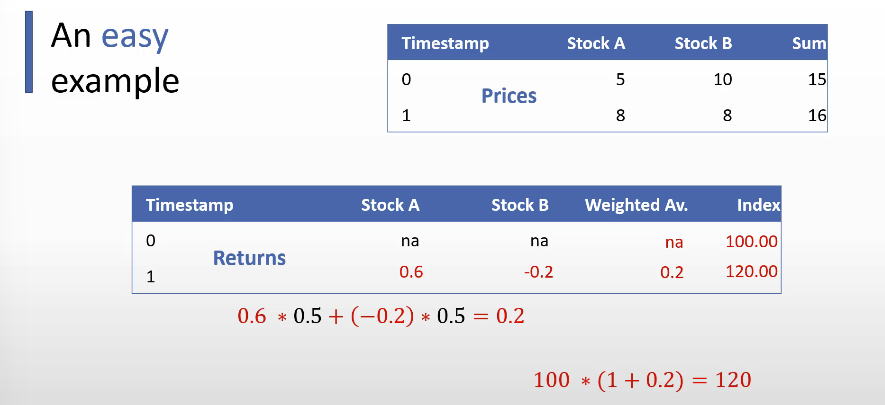

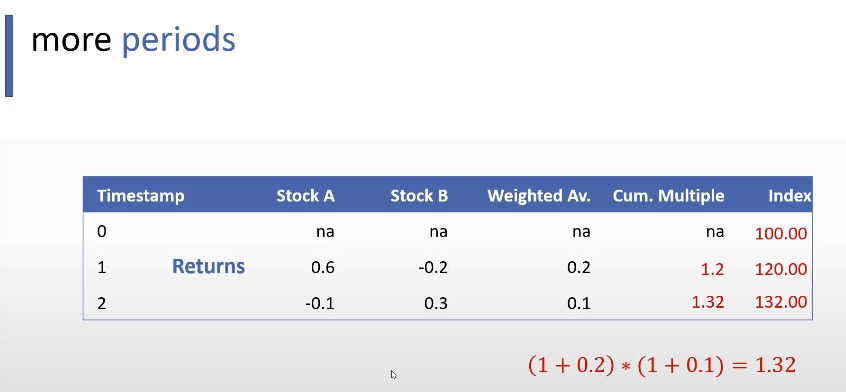

__Adcantages__
1. Higher degree of __Diversification__ (no concentrated positions)
2. Intuitive (equal invertment amounts per constituent)

__Disadvantages__
1. Biased to the performance of smaller stocks (higher risk). in fact, bigger stock (like AAPL) more stable in many aspects. 
2. Market capitalization better reflects a company's economic importance 
3. Does not reflect typical portfolio construction. 
4. Requires constant rebalancing (sell winners, buy losers) -> costs. 

# Building an Equal-weighted Index

In [20]:
# See the returns of each instument
returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.04,-0.01,0.01,0.00,0.03,0.03,-0.00,-0.01,0.01,0.05,...,0.01,0.03,-0.00,-0.01,0.00,0.01,-0.00,-0.03,0.06,0.01
2020-09-02,-0.02,0.03,0.02,0.02,0.02,-0.02,0.01,0.00,0.01,0.04,...,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.00,0.02
2020-09-03,-0.08,-0.04,0.00,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.02,...,-0.06,-0.03,-0.02,-0.02,-0.01,-0.03,0.00,-0.00,-0.02,-0.03
2020-09-04,0.00,0.00,0.01,0.01,0.01,-0.04,-0.00,-0.00,-0.01,0.00,...,-0.01,-0.00,-0.00,0.01,-0.01,-0.02,-0.00,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.03,-0.01,-0.03,-0.01,-0.02,-0.03,-0.02,-0.04,-0.13,-0.04,...,-0.02,-0.02,-0.00,-0.01,-0.02,-0.04,-0.01,-0.04,-0.02,-0.02
2022-11-10,0.09,0.00,0.06,0.05,0.03,0.10,0.04,0.02,0.04,0.05,...,0.08,0.08,0.03,0.01,0.01,0.06,0.02,0.04,0.02,0.04
2022-11-11,0.02,-0.02,0.00,-0.00,0.02,0.01,-0.02,0.03,0.05,0.06,...,0.02,0.07,-0.00,-0.01,-0.04,-0.00,-0.01,0.07,0.00,0.00


__Compute the mean return of each day for the constituents__
- the `mean()` means that its equally weighted.
- so which constituents with its retur has the very same weigths as all other constituents (instuments).

In [21]:
mean_ret = returns[const].mean(axis = 1)
mean_ret

# Interpretation
# 2022-11-10    0.04:
# in 2022-11-10, the return of the constituents was 0.04 

Date
2020-08-31     NaN
2020-09-01    0.01
2020-09-02    0.02
2020-09-03   -0.02
2020-09-04   -0.00
              ... 
2022-11-09   -0.02
2022-11-10    0.04
2022-11-11    0.01
2022-11-14   -0.01
2022-11-15    0.00
Length: 558, dtype: float64

Now, we can turn the simple return into a __normalized prices__ with a base value of 100.

In [77]:
mean_ret.add(1).cumprod()

Date
2020-08-31    NaN
2020-09-01   1.01
2020-09-02   1.02
2020-09-03   1.00
2020-09-04   1.00
             ... 
2022-11-09   1.13
2022-11-10   1.18
2022-11-11   1.19
2022-11-14   1.18
2022-11-15   1.19
Length: 558, dtype: float64

__How do we calculate the Equaly weighted index?__
1. take each `mean_ret` and add 1. `(e.g: 0.4 + 1 = 1.04)`
2. then, we take the cumelative product of the returns. why? 
    - is related to the compounding effect of returns over time. calculates the cumulative product of the growth factors 
    - > E.g: `mean_ret.add(1).cumprod()` => 1.01 * 1.02 * 0.98 ... **=** 1.01,  1.02 , 1.009596
3. then (after all the calculation), multiple each return by 100, for make our EWI with base of 100. 

In [22]:
ewi = mean_ret.add(1).cumprod().mul(100)
ewi

Date
2020-08-31      NaN
2020-09-01   100.65
2020-09-02   102.44
2020-09-03    99.92
2020-09-04    99.62
              ...  
2022-11-09   113.10
2022-11-10   117.79
2022-11-11   118.79
2022-11-14   118.13
2022-11-15   118.56
Length: 558, dtype: float64

In [23]:
ewi[0] = 100

C:\Users\97250\AppData\Local\Temp\ipykernel_25144\3881896706.py:1: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ewi[0] = 100


In [24]:
ewi.name = "ewi"
ewi

Date
2020-08-31   100.00
2020-09-01   100.65
2020-09-02   102.44
2020-09-03    99.92
2020-09-04    99.62
              ...  
2022-11-09   113.10
2022-11-10   117.79
2022-11-11   118.79
2022-11-14   118.13
2022-11-15   118.56
Name: ewi, Length: 558, dtype: float64

So we started with EWI of 100.00, and finish with 118.56 (increasing of 18.56%)

---

# Market Value-Weighted Index - Theory

> In contrast to an equally weighted index, a market value-weighted index, also known as a capitalization-weighted index, calculates the index value based on the market capitalization of the individual components. Here's how it works:

1. **Market Capitalization**:
    - Definition: Market capitalization (market cap) is the total market value of a company's outstanding shares of stock. It is calculated by multiplying the stock's current market price by the total number of outstanding shares.
    - Role in Market Value-Weighted Index: In a market value-weighted index, each stock's contribution to the index is proportional to its market cap. Stocks with higher market caps have a greater influence on the index value.<br><br>


2. __Calculation of Index Value:__
    - The index value is calculated by summing the market caps of all the individual components in the index.
    - The weight of each stock in the index is determined by its market cap relative to the total market cap of all the stocks in the index.
<br><br>

3. __Performance Impact:__
    - Changes in the stock prices of companies with larger market caps have a more significant impact on the index value compared to changes in the stock prices of smaller companies.
    - This method reflects the market's valuation of each company, giving more weight to larger, more valuable companies.
<br><br>

4. __Rebalancing:__
    - The index is periodically rebalanced to account for changes in market caps. For example, if a stock's price increases significantly, its market cap and, consequently, its weight in the index will increase. Rebalancing ensures that the index accurately reflects the current market landscape.
    - Examples:
        - The S&P 500 and the Nasdaq Composite are examples of market value-weighted indices. In these indices, companies with larger market caps, such as Apple or Microsoft, have a more substantial impact on the index's movements.
<br><br>

5. __Investor Implications:__
    - Investors using market value-weighted indices as benchmarks need to be aware of the impact of larger companies on the index. Changes in the largest components can drive the overall performance of the index.

__EXAMPLE__

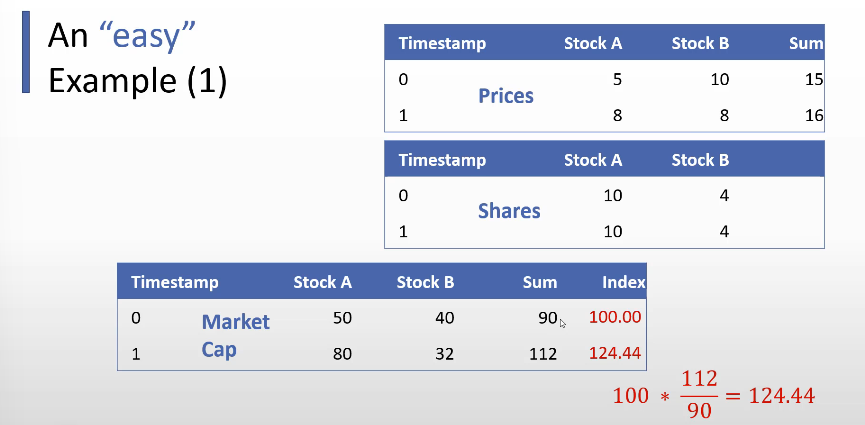

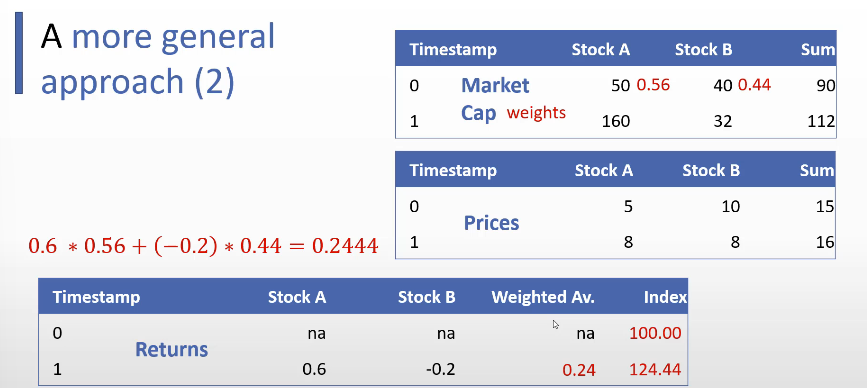

__Advantages__
- Best reflects the aggegate market / avarage investor portfolio
- Weights of constituents are based on __economic importance__.
- Does not requre rebalancing (self rebalancing)

__Disadvantages__
- Overconcentration in few stocks with high Market cap.
- The highest valued stock may be overvalued. 
- High data need

# Building a Value-weighted Index (Part 1)

__Historical Market Caps__

- Hard to get from free Web Soruces
- Still, we can calculate an approximation with yahoo finance data
- Course might cover a paid data source with historical market caps

In [100]:
import yfinance as yf
from yahooquery import Ticker

In [101]:
const

Index(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW',
       'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT'],
      dtype='object')

__--- Brif asaid on market cap ---__ 

In [102]:
# Get the apple ticker
ticker = yf.Ticker(ticker = "AAPL") #yfinance
ticker

yfinance.Ticker object <AAPL>

In [103]:
# Get the number of shares of AAPL
shares = Ticker("AAPL").key_stats["AAPL"]["sharesOutstanding"] #yahooquery
shares

15552799744

In [104]:
# Measure the market cap of AAPL fir each day! 
# multiple the close price by all the shares = market cap for each day.
mcap = close.AAPL * shares
mcap

# Interpretation 
# 2020-08-31   2006933174546.33:
# in the date 2020-08-31, the market cap of AAPL is 2006933174546.33!

# and so on... 

Date
2020-08-31   2006933174546.33
2020-09-01   2086874555737.81
2020-09-02   2043637791434.84
2020-09-03   1880022390337.68
2020-09-04   1881266642795.23
                   ...       
2022-11-09   2097606025531.88
2022-11-10   2284239622459.88
2022-11-11   2328254074213.42
2022-11-14   2306169127054.97
2022-11-15   2333541969170.33
Name: AAPL, Length: 558, dtype: float64

__---end brif asaid---__

(Simplified) Assumption: __Outstanding Shares remained constant__ in the most recent time period (no new share issues or buy-backs)

In [105]:
# Take the close price of all those instuments
mcap = close[const].copy() # dummy df to insert mcaps
mcap

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,253.32,101.59,171.82,142.31,272.65,42.22,83.93,131.87,45.12,...,81.36,225.53,111.89,138.33,116.04,312.55,211.99,59.27,38.02,138.85
2020-09-01,134.18,250.86,102.47,172.10,146.05,281.25,42.03,83.08,133.55,47.27,...,80.56,227.27,114.84,138.18,114.69,312.83,213.35,59.16,36.76,147.59
2020-09-02,131.40,258.12,104.40,174.78,149.27,276.69,42.42,83.19,135.39,49.22,...,82.95,231.65,116.80,140.51,117.48,320.24,216.48,60.53,37.17,147.68
2020-09-03,120.88,247.91,104.46,168.77,146.76,265.01,40.95,82.28,133.24,48.39,...,81.57,217.30,112.85,138.26,115.35,316.23,208.96,60.61,37.09,144.54
2020-09-04,120.96,248.40,105.67,171.05,148.18,254.70,40.82,81.93,131.99,48.60,...,81.34,214.25,112.40,137.96,116.57,312.00,204.66,60.48,36.89,142.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,134.87,289.65,145.86,168.74,225.54,142.06,43.91,177.93,86.75,47.68,...,101.59,224.51,92.10,136.48,182.15,540.66,193.93,37.62,36.89,139.47
2022-11-10,146.87,291.01,154.75,177.58,232.45,156.30,45.66,181.30,90.46,49.96,...,101.89,242.98,99.49,141.18,183.30,544.17,205.57,38.52,38.49,142.36
2022-11-11,149.70,285.02,154.89,177.49,236.49,157.73,44.79,186.46,95.01,53.14,...,97.96,247.11,106.09,140.97,181.73,522.08,205.00,38.30,41.26,142.58


In [106]:
# Take the market cap of each instrument for each day. 
count = 1
for symbol in const: # for each instrument
    try:
        # Get total shares for each instruments
        shares = Ticker(symbols = symbol).key_stats[symbol]["sharesOutstanding"]
        # compute the market cap for day (of each instuments)
        mcap[symbol] = mcap[symbol] * shares
       
        print(count, end = '\r')
        count += 1
    
    except Exception as e:
        print("{} not found".format(symbol))

print("Download complete.")

CAT not found
Download complete.


In [107]:
mcap

# Interpretation
# in 2020-08-31,
# the market kap of AAPL is 2006933174546.33$, and of AMGN is 135571290826.64$

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,2006933174546.33,135571290826.64,74033301845.81,103947156694.66,142.31,265288444061.28,171013805095.55,157960461103.00,234860452864.03,31647031529.87,...,206179283050.25,1676197610378.30,136954476362.68,326028613508.55,26503421097.43,289085294959.01,337912068756.10,249177014614.40,32846048999.63,373723113541.58
2020-09-01,2086874555737.81,134254749392.89,74674601870.06,104116549522.89,146.05,273656250000.00,170244192600.45,156360721433.98,237852546887.98,33155036132.91,...,204148211965.46,1689129783771.96,140565302080.10,325675058413.78,26195082785.13,289344272827.71,340079909729.00,248714561037.87,31757514244.03,397247321097.45
2020-09-02,2043637791434.84,138140138616.91,76081081841.58,105737883516.22,149.27,269219372375.49,171823900740.68,156567748087.97,241129580248.00,34522760802.44,...,210193092622.17,1721683005875.48,142964369866.58,331166616690.34,26832316226.56,296197970405.61,345069113189.70,254474173678.92,32111719265.48,397489551634.91
2020-09-03,1880022390337.68,132675975973.32,76124804821.45,102101974925.22,146.76,257854739501.95,165869617400.72,154855075652.02,237300441255.96,33940600014.78,...,206711231620.05,1615030141542.26,138129524826.71,325863613938.34,26345825224.29,292489040381.69,333082250701.90,254810509384.54,32042607778.54,389038055078.66
2020-09-04,1881266642795.23,132938207959.13,77006586794.91,103481321801.44,148.18,247823097030.64,165343042870.11,154196361007.00,235074191335.96,34087892740.95,...,206106745487.69,1592361725568.00,137578724069.29,325156575675.37,26624472292.86,288576597504.00,326228045837.40,254263971881.60,31869824117.83,384435510587.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,2097606025531.88,155014299799.13,106294889671.03,102083826353.00,225.54,138224377624.51,177859212187.06,334873151256.09,154501744448.00,33442608792.61,...,257431092272.78,1668616673326.34,112731317658.71,321668352416.04,41602877913.16,500069921335.43,309124408325.20,158158241121.06,31869824117.83,375391867559.52
2022-11-10,2284239622459.88,155742150350.19,112773441024.00,107431821029.67,232.45,152079902969.36,184947657243.06,341215679445.96,161109252580.01,35041793078.17,...,258191306034.80,1805890526372.04,121776750693.39,332745728749.78,41865538863.42,503316417089.82,327678591674.80,161941937622.40,33252090107.97,383170474131.76
2022-11-11,2328254074213.42,152536423120.04,112875465016.97,107377375313.00,236.49,153471285842.90,181423691741.66,350927064585.91,169212807723.99,37272235726.78,...,248232606284.20,1836585796858.85,129855214720.10,332250801965.70,41506950748.01,482884855630.18,326770000000.00,161017030469.33,35645131780.03,383762620603.27


In [108]:
# See the most recent market cap of each stock 
mcap.iloc[-1].sort_values(ascending = False)

AAPL   2333541969170.33
MSFT   1798383984501.70
UNH     465246529258.39
JNJ     414991019796.63
WMT     396843603535.03
JPM     384330882839.25
CVX     353919517269.96
V       334724068756.10
PG      331119504781.66
HD      311951832766.15
KO      262128348067.50
MRK     252388397694.99
MCD     194275602909.16
CSCO    181869253617.43
DIS     170103307691.99
VZ      158494576826.67
CRM     157694117126.46
AMGN    151776479528.87
HON     142022439824.94
IBM     131799589651.90
NKE     130614104272.03
INTC    129473356140.14
GS      124861764152.34
AXP     112146719032.97
BA      106082724850.89
MMM      72475036364.46
TRV      40997621936.00
DOW      36192083716.95
WBA      35118146393.43
CAT              234.59
Name: 2022-11-15 00:00:00, dtype: float64

In [109]:
# the "CAT" is not relevant instrument. 
mcap = mcap[mcap.columns.drop(["CAT"])]

__Plot the Value Weigthed Index__
- You can see that wehere the capital market  (on an instument) is higher, the instument have more weigths in the index. 

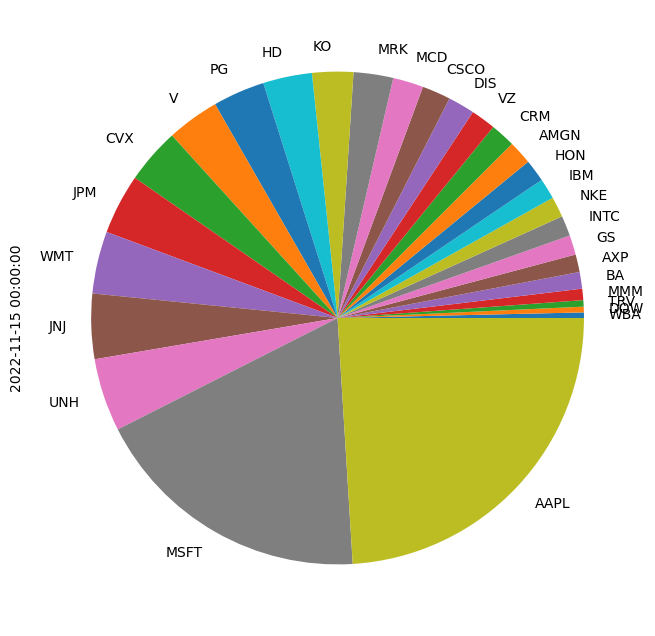

In [110]:
plt.figure(figsize = (12, 8))
mcap.iloc[-1].sort_values().plot.pie()
plt.show()

---

# Building a Value-weighted Index (Part 2)

In [111]:
# Plot the capital market of each instrument for each day 
mcap

,AAPL,AMGN,AXP,BA,CRM,CSCO,CVX,DIS,DOW,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,2006933174546.33,135571290826.64,74033301845.81,103947156694.66,265288444061.28,171013805095.55,157960461103.00,234860452864.03,31647031529.87,66810563847.66,...,206179283050.25,1676197610378.30,136954476362.68,326028613508.55,26503421097.43,289085294959.01,337912068756.10,249177014614.40,32846048999.63,373723113541.58
2020-09-01,2086874555737.81,134254749392.89,74674601870.06,104116549522.89,273656250000.00,170244192600.45,156360721433.98,237852546887.98,33155036132.91,67002973709.47,...,204148211965.46,1689129783771.96,140565302080.10,325675058413.78,26195082785.13,289344272827.71,340079909729.00,248714561037.87,31757514244.03,397247321097.45
2020-09-02,2043637791434.84,138140138616.91,76081081841.58,105737883516.22,269219372375.49,171823900740.68,156567748087.97,241129580248.00,34522760802.44,68496562290.53,...,210193092622.17,1721683005875.48,142964369866.58,331166616690.34,26832316226.56,296197970405.61,345069113189.70,254474173678.92,32111719265.48,397489551634.91
2020-09-03,1880022390337.68,132675975973.32,76124804821.45,102101974925.22,257854739501.95,165869617400.72,154855075652.02,237300441255.96,33940600014.78,67687805923.83,...,206711231620.05,1615030141542.26,138129524826.71,325863613938.34,26345825224.29,292489040381.69,333082250701.90,254810509384.54,32042607778.54,389038055078.66
2020-09-04,1881266642795.23,132938207959.13,77006586794.91,103481321801.44,247823097030.64,165343042870.11,154196361007.00,235074191335.96,34087892740.95,68790066076.17,...,206106745487.69,1592361725568.00,137578724069.29,325156575675.37,26624472292.86,288576597504.00,326228045837.40,254263971881.60,31869824117.83,384435510587.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,2097606025531.88,155014299799.13,106294889671.03,102083826353.00,138224377624.51,177859212187.06,334873151256.09,154501744448.00,33442608792.61,118052544000.00,...,257431092272.78,1668616673326.34,112731317658.71,321668352416.04,41602877913.16,500069921335.43,309124408325.20,158158241121.06,31869824117.83,375391867559.52
2022-11-10,2284239622459.88,155742150350.19,112773441024.00,107431821029.67,152079902969.36,184947657243.06,341215679445.96,161109252580.01,35041793078.17,123371429923.83,...,258191306034.80,1805890526372.04,121776750693.39,332745728749.78,41865538863.42,503316417089.82,327678591674.80,161941937622.40,33252090107.97,383170474131.76
2022-11-11,2328254074213.42,152536423120.04,112875465016.97,107377375313.00,153471285842.90,181423691741.66,350927064585.91,169212807723.99,37272235726.78,125608563418.95,...,248232606284.20,1836585796858.85,129855214720.10,332250801965.70,41506950748.01,482884855630.18,326770000000.00,161017030469.33,35645131780.03,383762620603.27


In [112]:
# Compute the total cap of Doe Jons (our VWI)
total_mcap = mcap.sum(axis = "columns") # total market cap
total_mcap

# E.g. the total cap of this index in 2020-08-31 is 8737325228856.89 

Date
2020-08-31   8737325228856.89
2020-09-01   8861515415593.10
2020-09-02   8932604632731.59
2020-09-03   8545477849027.84
2020-09-04   8493455860620.56
                   ...       
2022-11-09   9174592703466.94
2022-11-10   9680703121271.02
2022-11-11   9745693653107.53
2022-11-14   9657097517588.02
2022-11-15   9715566582474.33
Length: 558, dtype: float64

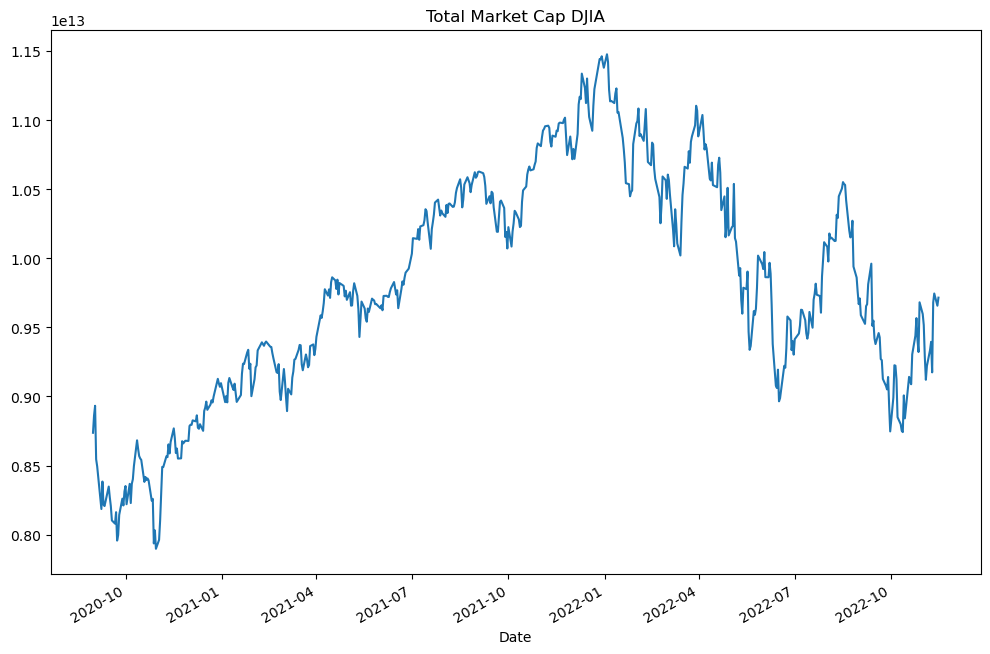

In [113]:
# Plot the total capital market. 
total_mcap.plot(figsize = (12, 8))
plt.title("Total Market Cap DJIA")
plt.show()

__Weights over time__

Now, let's get the relative weight of each instoment in the index! 

> __For get the proportion weigth of each instument, we need to devide the capital market of each company with total market cap of this index__


In [114]:
# each intrument / total cap the entire index 
weights_VWI = mcap.div(total_mcap, axis = "rows")
weights_VWI


# Interpretation
# in 2020-08-31,
# the wegith of AAPL is 0.23% from the index. (large company, high cap)!
# and the weigth of CVX os 0.02% (relative small company compare to AAPL, small cap.)

,AAPL,AMGN,AXP,BA,CRM,CSCO,CVX,DIS,DOW,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.23,0.02,0.01,0.01,0.03,0.02,0.02,0.03,0.00,0.01,...,0.02,0.19,0.02,0.04,0.00,0.03,0.04,0.03,0.00,0.04
2020-09-01,0.24,0.02,0.01,0.01,0.03,0.02,0.02,0.03,0.00,0.01,...,0.02,0.19,0.02,0.04,0.00,0.03,0.04,0.03,0.00,0.04
2020-09-02,0.23,0.02,0.01,0.01,0.03,0.02,0.02,0.03,0.00,0.01,...,0.02,0.19,0.02,0.04,0.00,0.03,0.04,0.03,0.00,0.04
2020-09-03,0.22,0.02,0.01,0.01,0.03,0.02,0.02,0.03,0.00,0.01,...,0.02,0.19,0.02,0.04,0.00,0.03,0.04,0.03,0.00,0.05
2020-09-04,0.22,0.02,0.01,0.01,0.03,0.02,0.02,0.03,0.00,0.01,...,0.02,0.19,0.02,0.04,0.00,0.03,0.04,0.03,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.23,0.02,0.01,0.01,0.02,0.02,0.04,0.02,0.00,0.01,...,0.03,0.18,0.01,0.04,0.00,0.05,0.03,0.02,0.00,0.04
2022-11-10,0.24,0.02,0.01,0.01,0.02,0.02,0.04,0.02,0.00,0.01,...,0.03,0.19,0.01,0.03,0.00,0.05,0.03,0.02,0.00,0.04
2022-11-11,0.24,0.02,0.01,0.01,0.02,0.02,0.04,0.02,0.00,0.01,...,0.03,0.19,0.01,0.03,0.00,0.05,0.03,0.02,0.00,0.04


__We make sure that the weigths of each time must sum to 1!__

In [115]:
weights_VWI.sum(axis = "columns")

Date
2020-08-31   1.00
2020-09-01   1.00
2020-09-02   1.00
2020-09-03   1.00
2020-09-04   1.00
             ... 
2022-11-09   1.00
2022-11-10   1.00
2022-11-11   1.00
2022-11-14   1.00
2022-11-15   1.00
Length: 558, dtype: float64

__Its not surprise that we have high concentration of two stocks (big companies!)__

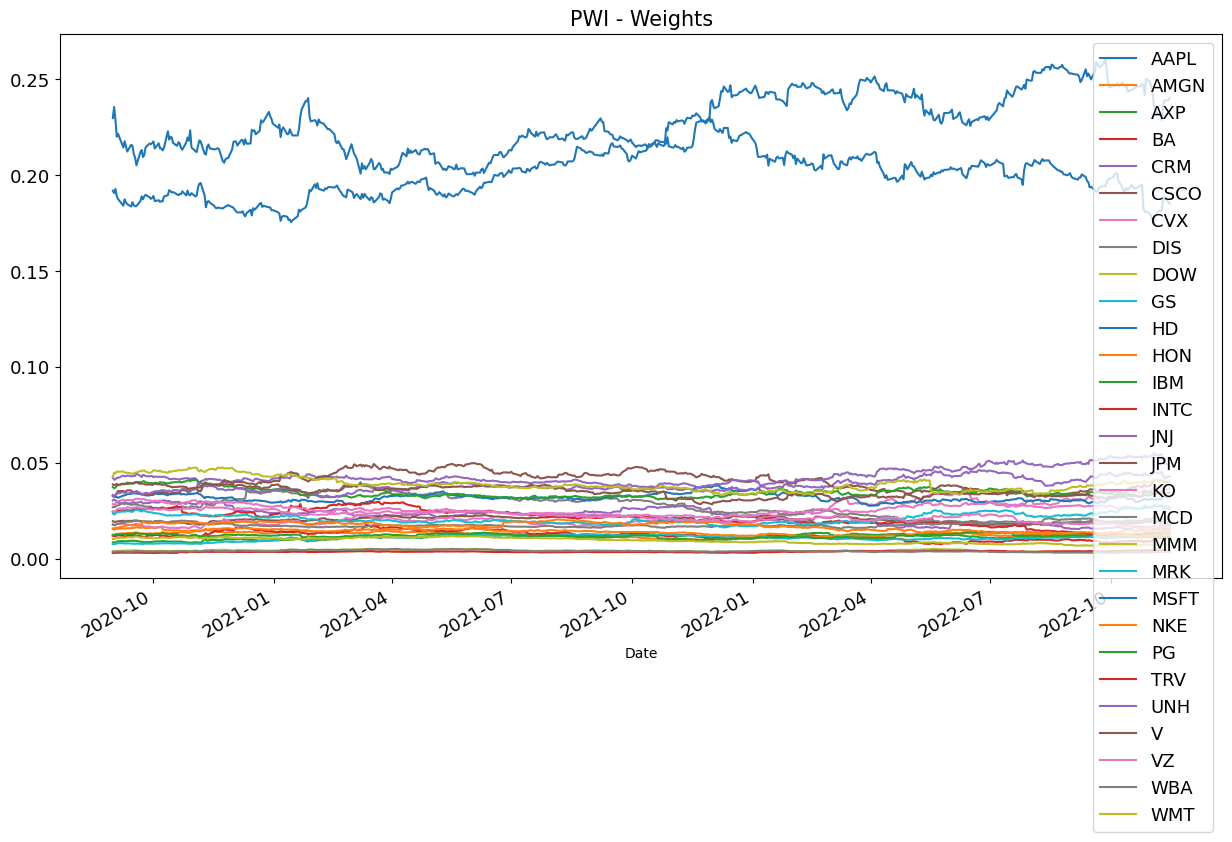

In [116]:
weights_VWI.plot(figsize = (15, 8), fontsize = 13)
plt.title("PWI - Weights", fontsize = 15)
plt.legend(fontsize = 13)
plt.show()

__For calculate the weighted value index. its importent to understand the following:__

In [117]:
# daily return
returns 

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.04,-0.01,0.01,0.00,0.03,0.03,-0.00,-0.01,0.01,0.05,...,0.01,0.03,-0.00,-0.01,0.00,0.01,-0.00,-0.03,0.06,0.01
2020-09-02,-0.02,0.03,0.02,0.02,0.02,-0.02,0.01,0.00,0.01,0.04,...,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.00,0.02
2020-09-03,-0.08,-0.04,0.00,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.02,...,-0.06,-0.03,-0.02,-0.02,-0.01,-0.03,0.00,-0.00,-0.02,-0.03
2020-09-04,0.00,0.00,0.01,0.01,0.01,-0.04,-0.00,-0.00,-0.01,0.00,...,-0.01,-0.00,-0.00,0.01,-0.01,-0.02,-0.00,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.03,-0.01,-0.03,-0.01,-0.02,-0.03,-0.02,-0.04,-0.13,-0.04,...,-0.02,-0.02,-0.00,-0.01,-0.02,-0.04,-0.01,-0.04,-0.02,-0.02
2022-11-10,0.09,0.00,0.06,0.05,0.03,0.10,0.04,0.02,0.04,0.05,...,0.08,0.08,0.03,0.01,0.01,0.06,0.02,0.04,0.02,0.04
2022-11-11,0.02,-0.02,0.00,-0.00,0.02,0.01,-0.02,0.03,0.05,0.06,...,0.02,0.07,-0.00,-0.01,-0.04,-0.00,-0.01,0.07,0.00,0.00


In [118]:
# weights at the end of the day
# (the weigth of each instrument relative to the index.)
weights_VWI 

,AAPL,AMGN,AXP,BA,CRM,CSCO,CVX,DIS,DOW,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.23,0.02,0.01,0.01,0.03,0.02,0.02,0.03,0.00,0.01,...,0.02,0.19,0.02,0.04,0.00,0.03,0.04,0.03,0.00,0.04
2020-09-01,0.24,0.02,0.01,0.01,0.03,0.02,0.02,0.03,0.00,0.01,...,0.02,0.19,0.02,0.04,0.00,0.03,0.04,0.03,0.00,0.04
2020-09-02,0.23,0.02,0.01,0.01,0.03,0.02,0.02,0.03,0.00,0.01,...,0.02,0.19,0.02,0.04,0.00,0.03,0.04,0.03,0.00,0.04
2020-09-03,0.22,0.02,0.01,0.01,0.03,0.02,0.02,0.03,0.00,0.01,...,0.02,0.19,0.02,0.04,0.00,0.03,0.04,0.03,0.00,0.05
2020-09-04,0.22,0.02,0.01,0.01,0.03,0.02,0.02,0.03,0.00,0.01,...,0.02,0.19,0.02,0.04,0.00,0.03,0.04,0.03,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.23,0.02,0.01,0.01,0.02,0.02,0.04,0.02,0.00,0.01,...,0.03,0.18,0.01,0.04,0.00,0.05,0.03,0.02,0.00,0.04
2022-11-10,0.24,0.02,0.01,0.01,0.02,0.02,0.04,0.02,0.00,0.01,...,0.03,0.19,0.01,0.03,0.00,0.05,0.03,0.02,0.00,0.04
2022-11-11,0.24,0.02,0.01,0.01,0.02,0.02,0.04,0.02,0.00,0.01,...,0.03,0.19,0.01,0.03,0.00,0.05,0.03,0.02,0.00,0.04


In [119]:
# Market cap weigths return:
# 1. we multiple the return of each instument * its weigth 
# 2. we sum all the results (of each day!) 

mcwr = returns[const].mul(weights_VWI.shift()).sum(axis = "columns")
mcwr # simple returns vwi

Date
2020-08-31    0.00
2020-09-01    0.01
2020-09-02    0.01
2020-09-03   -0.04
2020-09-04   -0.01
              ... 
2022-11-09   -0.02
2022-11-10    0.06
2022-11-11    0.01
2022-11-14   -0.01
2022-11-15    0.01
Length: 558, dtype: float64

In [120]:
# then, we take the simple returns, add 1,
# make cumulative product, and convert, and convert to base of 100
vwi = mcwr.add(1).cumprod().mul(100)
vwi

Date
2020-08-31   100.00
2020-09-01   101.42
2020-09-02   102.24
2020-09-03    97.80
2020-09-04    97.21
              ...  
2022-11-09   105.00
2022-11-10   110.80
2022-11-11   111.54
2022-11-14   110.53
2022-11-15   111.20
Length: 558, dtype: float64

In [121]:
vwi.name = "vwi"
vwi

Date
2020-08-31   100.00
2020-09-01   101.42
2020-09-02   102.24
2020-09-03    97.80
2020-09-04    97.21
              ...  
2022-11-09   105.00
2022-11-10   110.80
2022-11-11   111.54
2022-11-14   110.53
2022-11-15   111.20
Name: vwi, Length: 558, dtype: float64

---

# Analysis and Comparison (Part 1)

__Let's compare between 3 different indexes on the Dow jones's instrument:__
1. PWI - Price weighted index
2. EWI - Equaly weighted index
3. VWI - Value weighted index

In [122]:
indices = pd.concat([vwi, pwi, ewi], axis = 1).iloc[:-1]
indices

,vwi,pwi,ewi
Date,,,
2020-08-31,100.00,100.00,100.00
2020-09-01,101.42,100.76,100.65
2020-09-02,102.24,102.36,102.44
2020-09-03,97.80,99.51,99.92
2020-09-04,97.21,98.96,99.62
...,...,...,...
2022-11-08,107.53,116.69,115.69
2022-11-09,105.00,114.42,113.10
2022-11-10,110.80,118.64,117.79


__Plot the 3 different indexes__
> __We can see that the most efficient index is the EWI.__

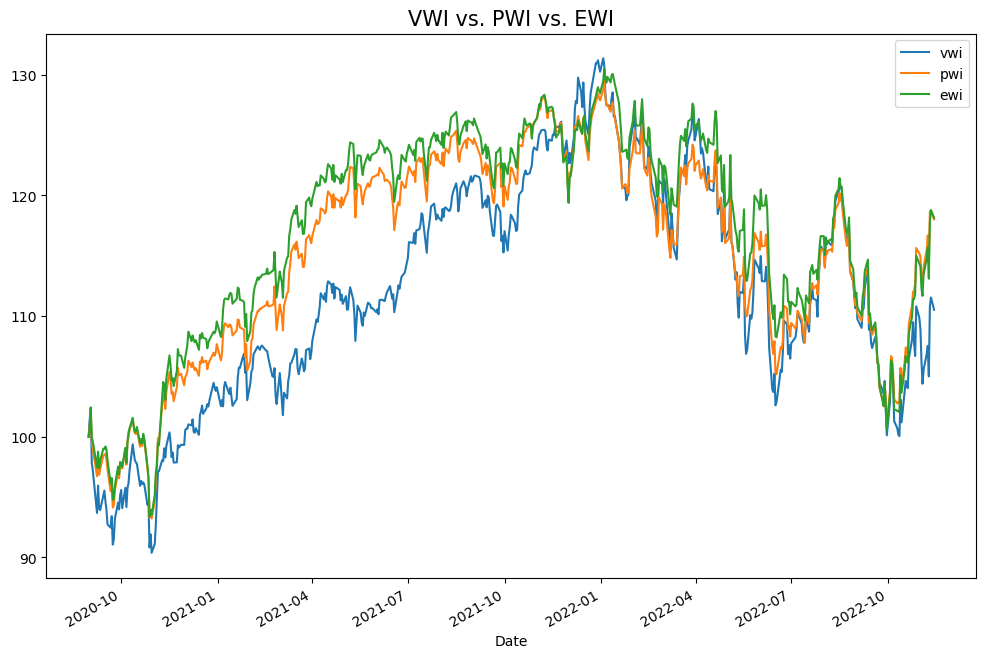

In [123]:
indices.plot(figsize = (12, 8))
plt.title("VWI vs. PWI vs. EWI", fontsize = 15)
plt.show()

__Keep in mind:__ While VWI and PWI are (mostly) __self-rebalancing__, EWI requires/assumes __daily rebalancing__! -> __Trading Costs__! 

---

# Analysis and Comparison (Part 2)

In [124]:
# Look at the 3 different indexes
indices

,vwi,pwi,ewi
Date,,,
2020-08-31,100.00,100.00,100.00
2020-09-01,101.42,100.76,100.65
2020-09-02,102.24,102.36,102.44
2020-09-03,97.80,99.51,99.92
2020-09-04,97.21,98.96,99.62
...,...,...,...
2022-11-08,107.53,116.69,115.69
2022-11-09,105.00,114.42,113.10
2022-11-10,110.80,118.64,117.79


In [125]:
# Look at the close price of the instrument
close

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,253.32,101.59,171.82,142.31,272.65,42.22,83.93,131.87,45.12,...,225.53,111.89,138.33,116.04,312.55,211.99,59.27,38.02,138.85,28430.05
2020-09-01,134.18,250.86,102.47,172.10,146.05,281.25,42.03,83.08,133.55,47.27,...,227.27,114.84,138.18,114.69,312.83,213.35,59.16,36.76,147.59,28645.66
2020-09-02,131.40,258.12,104.40,174.78,149.27,276.69,42.42,83.19,135.39,49.22,...,231.65,116.80,140.51,117.48,320.24,216.48,60.53,37.17,147.68,29100.50
2020-09-03,120.88,247.91,104.46,168.77,146.76,265.01,40.95,82.28,133.24,48.39,...,217.30,112.85,138.26,115.35,316.23,208.96,60.61,37.09,144.54,28292.73
2020-09-04,120.96,248.40,105.67,171.05,148.18,254.70,40.82,81.93,131.99,48.60,...,214.25,112.40,137.96,116.57,312.00,204.66,60.48,36.89,142.83,28133.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,134.87,289.65,145.86,168.74,225.54,142.06,43.91,177.93,86.75,47.68,...,224.51,92.10,136.48,182.15,540.66,193.93,37.62,36.89,139.47,32513.94
2022-11-10,146.87,291.01,154.75,177.58,232.45,156.30,45.66,181.30,90.46,49.96,...,242.98,99.49,141.18,183.30,544.17,205.57,38.52,38.49,142.36,33715.37
2022-11-11,149.70,285.02,154.89,177.49,236.49,157.73,44.79,186.46,95.01,53.14,...,247.11,106.09,140.97,181.73,522.08,205.00,38.30,41.26,142.58,33747.86


In [126]:
# Concatinate the:
# - Close price of the instruments
# - the 3 indexes
prices_m = pd.concat([close[const], indices], axis = 1)
prices_m

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,PG,TRV,UNH,V,VZ,WBA,WMT,vwi,pwi,ewi
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,253.32,101.59,171.82,142.31,272.65,42.22,83.93,131.87,45.12,...,138.33,116.04,312.55,211.99,59.27,38.02,138.85,100.00,100.00,100.00
2020-09-01,134.18,250.86,102.47,172.10,146.05,281.25,42.03,83.08,133.55,47.27,...,138.18,114.69,312.83,213.35,59.16,36.76,147.59,101.42,100.76,100.65
2020-09-02,131.40,258.12,104.40,174.78,149.27,276.69,42.42,83.19,135.39,49.22,...,140.51,117.48,320.24,216.48,60.53,37.17,147.68,102.24,102.36,102.44
2020-09-03,120.88,247.91,104.46,168.77,146.76,265.01,40.95,82.28,133.24,48.39,...,138.26,115.35,316.23,208.96,60.61,37.09,144.54,97.80,99.51,99.92
2020-09-04,120.96,248.40,105.67,171.05,148.18,254.70,40.82,81.93,131.99,48.60,...,137.96,116.57,312.00,204.66,60.48,36.89,142.83,97.21,98.96,99.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,134.87,289.65,145.86,168.74,225.54,142.06,43.91,177.93,86.75,47.68,...,136.48,182.15,540.66,193.93,37.62,36.89,139.47,105.00,114.42,113.10
2022-11-10,146.87,291.01,154.75,177.58,232.45,156.30,45.66,181.30,90.46,49.96,...,141.18,183.30,544.17,205.57,38.52,38.49,142.36,110.80,118.64,117.79
2022-11-11,149.70,285.02,154.89,177.49,236.49,157.73,44.79,186.46,95.01,53.14,...,140.97,181.73,522.08,205.00,38.30,41.26,142.58,111.54,118.76,118.79


In [127]:
# Now let's compute the simple return
returns_m = prices_m.pct_change().dropna() # simple returns
returns_m

C:\Users\97250\AppData\Local\Temp\ipykernel_25144\2408452845.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_m = prices_m.pct_change().dropna() # simple returns


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,PG,TRV,UNH,V,VZ,WBA,WMT,vwi,pwi,ewi
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,0.04,-0.01,0.01,0.00,0.03,0.03,-0.00,-0.01,0.01,0.05,...,-0.00,-0.01,0.00,0.01,-0.00,-0.03,0.06,0.01,0.01,0.01
2020-09-02,-0.02,0.03,0.02,0.02,0.02,-0.02,0.01,0.00,0.01,0.04,...,0.02,0.02,0.02,0.01,0.02,0.01,0.00,0.01,0.02,0.02
2020-09-03,-0.08,-0.04,0.00,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.02,...,-0.02,-0.02,-0.01,-0.03,0.00,-0.00,-0.02,-0.04,-0.03,-0.02
2020-09-04,0.00,0.00,0.01,0.01,0.01,-0.04,-0.00,-0.00,-0.01,0.00,...,-0.00,0.01,-0.01,-0.02,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00
2020-09-08,-0.07,-0.03,-0.02,-0.06,0.00,-0.05,-0.02,-0.04,0.02,-0.01,...,-0.01,-0.02,-0.02,-0.02,-0.01,-0.02,-0.03,-0.04,-0.02,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.03,-0.01,-0.03,-0.01,-0.02,-0.03,-0.02,-0.04,-0.13,-0.04,...,-0.00,-0.01,-0.02,-0.04,-0.01,-0.04,-0.02,-0.02,-0.02,-0.02
2022-11-10,0.09,0.00,0.06,0.05,0.03,0.10,0.04,0.02,0.04,0.05,...,0.03,0.01,0.01,0.06,0.02,0.04,0.02,0.06,0.04,0.04
2022-11-11,0.02,-0.02,0.00,-0.00,0.02,0.01,-0.02,0.03,0.05,0.06,...,-0.00,-0.01,-0.04,-0.00,-0.01,0.07,0.00,0.01,0.00,0.01


In [128]:
# A function for compute the annualize risk of the return of each instriment,
# and also for each index! 
def ann_risk_return(returns_df): # assumes simple returns as input

    # create a data frame of the return
    summary = pd.DataFrame(index = returns_df.columns) 
    # compute the annuaize risk of each return 
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    # compute the lof return 
    log_returns = np.log(returns_df + 1)
    # compute the Compund Annual Growth rate  
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [129]:
summary = ann_risk_return(returns_m)
summary

# So we can see each stock/index have the annualize risk, 
# and the compund annual growth rate. 

,ann. Risk,CAGR
AAPL,0.32,0.07
AMGN,0.22,0.05
AXP,0.35,0.21
BA,0.44,0.01
CAT,0.31,0.25
CRM,0.38,-0.21
CSCO,0.25,0.03
CVX,0.32,0.44
DIS,0.33,-0.14
DOW,0.31,0.06


__Now, we can plot the 30 instruments and the 3 indexes, and the risk & mea return__

We can see here somting intresting:
- The **PWI (Price Weighed Index)** and the **EWI (Equly Weigted index)** have the **smaller risk** compare to other instuments and indexes like VWI (Value weigted index).
    - its called portfolio diversification effect. 

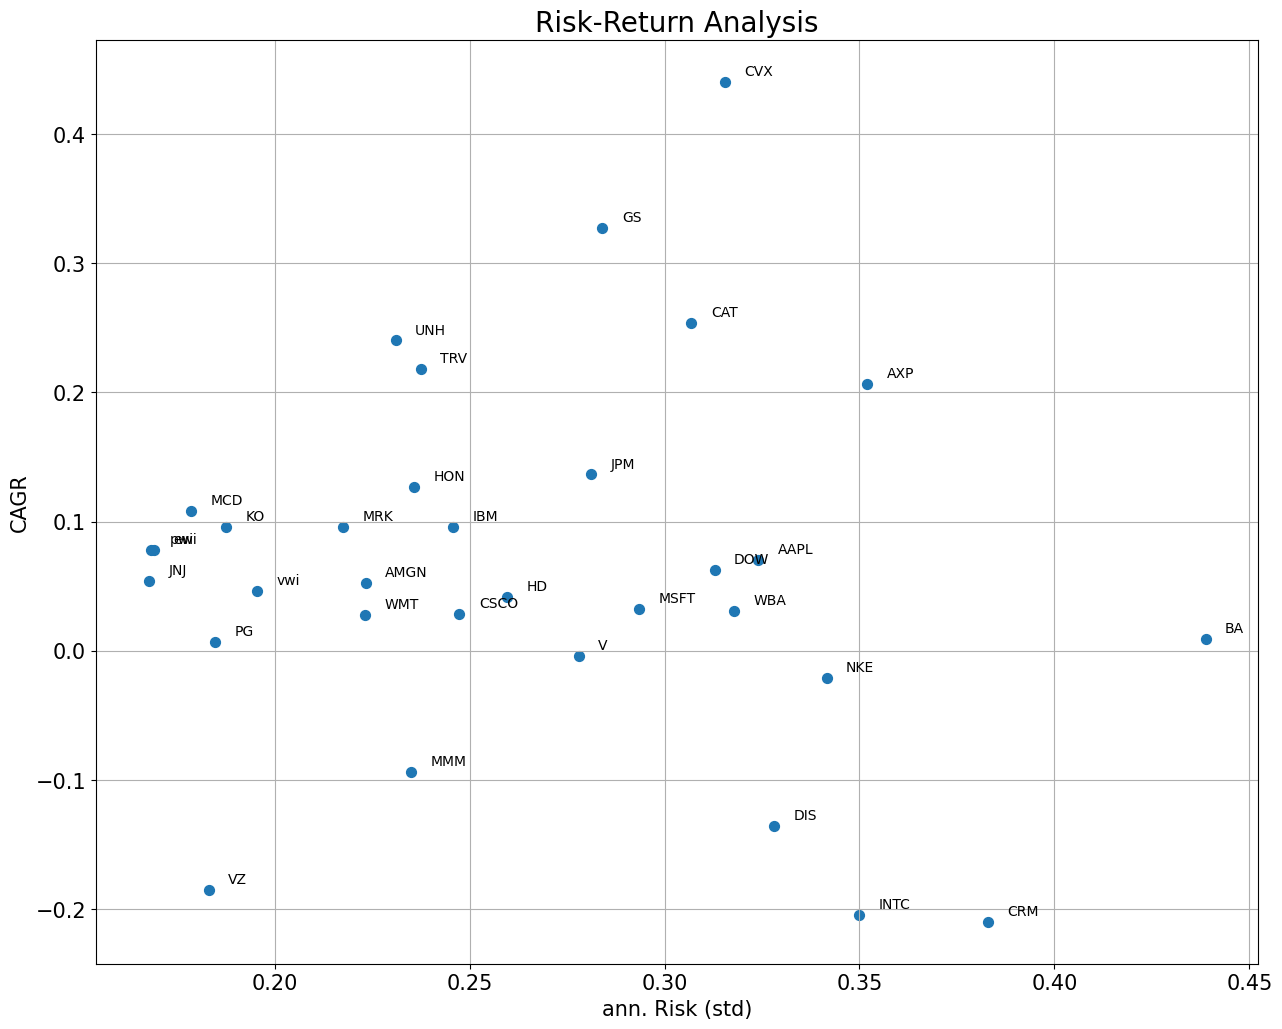

In [130]:
summary.plot(kind = "scatter", x = "ann. Risk", y = "CAGR", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.005, summary.loc[i, "CAGR"]+0.005), size = 10)
plt.grid()
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk-Return Analysis", fontsize = 20)
plt.show()

- All three Indexes benefit from the __Portfolio Diversification Effect__!
- __Concentrated Positions__ negatively affect __VWI__
- PWI and EWI are closely together (before Trading Costs)
- But: EWI requires __daily rebalancing__! (Trading Costs)

---

# The DJIA Total Return Index

So far we have ignore from **Dividends**. So for get the true performance we need to take in account the dividends as well. 

In [131]:
weights_PWI # based on Close Prices

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.03,0.06,0.02,0.04,0.03,0.06,0.01,0.02,0.03,0.01,...,0.02,0.05,0.03,0.03,0.03,0.07,0.05,0.01,0.01,0.03
2020-09-01,0.03,0.06,0.02,0.04,0.03,0.06,0.01,0.02,0.03,0.01,...,0.02,0.05,0.03,0.03,0.03,0.07,0.05,0.01,0.01,0.03
2020-09-02,0.03,0.06,0.02,0.04,0.03,0.06,0.01,0.02,0.03,0.01,...,0.02,0.05,0.03,0.03,0.03,0.07,0.05,0.01,0.01,0.03
2020-09-03,0.03,0.06,0.02,0.04,0.03,0.06,0.01,0.02,0.03,0.01,...,0.02,0.05,0.03,0.03,0.03,0.07,0.05,0.01,0.01,0.03
2020-09-04,0.03,0.06,0.02,0.04,0.03,0.06,0.01,0.02,0.03,0.01,...,0.02,0.05,0.03,0.03,0.03,0.07,0.05,0.01,0.01,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.03,0.06,0.03,0.03,0.05,0.03,0.01,0.04,0.02,0.01,...,0.02,0.05,0.02,0.03,0.04,0.11,0.04,0.01,0.01,0.03
2022-11-10,0.03,0.06,0.03,0.03,0.05,0.03,0.01,0.04,0.02,0.01,...,0.02,0.05,0.02,0.03,0.04,0.11,0.04,0.01,0.01,0.03
2022-11-11,0.03,0.06,0.03,0.03,0.05,0.03,0.01,0.04,0.02,0.01,...,0.02,0.05,0.02,0.03,0.04,0.10,0.04,0.01,0.01,0.03


In [132]:
# Compute the return, based on the Adjusted close. 
total_returns = df["Adj Close"].pct_change() # Adj Close Prices!
total_returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.04,-0.01,0.01,0.00,0.03,0.03,-0.00,-0.01,0.01,0.05,...,0.01,0.03,-0.00,-0.01,0.00,0.01,-0.00,-0.03,0.06,0.01
2020-09-02,-0.02,0.03,0.02,0.02,0.02,-0.02,0.01,0.00,0.01,0.04,...,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.00,0.02
2020-09-03,-0.08,-0.04,0.00,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.02,...,-0.06,-0.03,-0.02,-0.02,-0.01,-0.03,0.00,-0.00,-0.02,-0.03
2020-09-04,0.00,0.00,0.01,0.01,0.01,-0.04,-0.00,-0.00,-0.01,0.00,...,-0.01,-0.00,-0.00,0.01,-0.01,-0.02,-0.00,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.03,-0.01,-0.03,-0.01,-0.02,-0.03,-0.02,-0.04,-0.13,-0.04,...,-0.02,-0.02,-0.00,-0.01,-0.02,-0.04,-0.01,-0.04,-0.02,-0.02
2022-11-10,0.09,0.00,0.06,0.05,0.03,0.10,0.04,0.02,0.04,0.05,...,0.08,0.08,0.03,0.01,0.01,0.06,0.02,0.04,0.02,0.04
2022-11-11,0.02,-0.02,0.00,-0.00,0.02,0.01,-0.02,0.03,0.05,0.06,...,0.02,0.07,-0.00,-0.01,-0.04,-0.00,-0.01,0.07,0.00,0.00


In [133]:
# compute the simple return (total return Index)
# multiply the return of each instrument by its weigth, 
# and than sum each day (row or time period). 
returns_tr = total_returns[const].mul(weights_PWI.shift()).sum(axis = "columns")
returns_tr # simple returns DJI Total Return Index

Date
2020-08-31    0.00
2020-09-01    0.01
2020-09-02    0.02
2020-09-03   -0.03
2020-09-04   -0.01
              ... 
2022-11-09   -0.02
2022-11-10    0.04
2022-11-11    0.00
2022-11-14   -0.01
2022-11-15    0.00
Length: 558, dtype: float64

In [134]:
# cumelative return with base 100.
dji_tr = returns_tr.add(1).cumprod().mul(100)
dji_tr

Date
2020-08-31   100.00
2020-09-01   100.76
2020-09-02   102.39
2020-09-03    99.55
2020-09-04    98.99
              ...  
2022-11-09   119.30
2022-11-10   123.71
2022-11-11   123.83
2022-11-14   123.06
2022-11-15   123.27
Length: 558, dtype: float64

In [135]:
# add a new column - that contain the total return of the index Doe Jones.
returns_m["DJI_TR"] = returns_tr
returns_m

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,TRV,UNH,V,VZ,WBA,WMT,vwi,pwi,ewi,DJI_TR
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,0.04,-0.01,0.01,0.00,0.03,0.03,-0.00,-0.01,0.01,0.05,...,-0.01,0.00,0.01,-0.00,-0.03,0.06,0.01,0.01,0.01,0.01
2020-09-02,-0.02,0.03,0.02,0.02,0.02,-0.02,0.01,0.00,0.01,0.04,...,0.02,0.02,0.01,0.02,0.01,0.00,0.01,0.02,0.02,0.02
2020-09-03,-0.08,-0.04,0.00,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.02,...,-0.02,-0.01,-0.03,0.00,-0.00,-0.02,-0.04,-0.03,-0.02,-0.03
2020-09-04,0.00,0.00,0.01,0.01,0.01,-0.04,-0.00,-0.00,-0.01,0.00,...,0.01,-0.01,-0.02,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01
2020-09-08,-0.07,-0.03,-0.02,-0.06,0.00,-0.05,-0.02,-0.04,0.02,-0.01,...,-0.02,-0.02,-0.02,-0.01,-0.02,-0.03,-0.04,-0.02,-0.02,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.03,-0.01,-0.03,-0.01,-0.02,-0.03,-0.02,-0.04,-0.13,-0.04,...,-0.01,-0.02,-0.04,-0.01,-0.04,-0.02,-0.02,-0.02,-0.02,-0.02
2022-11-10,0.09,0.00,0.06,0.05,0.03,0.10,0.04,0.02,0.04,0.05,...,0.01,0.01,0.06,0.02,0.04,0.02,0.06,0.04,0.04,0.04
2022-11-11,0.02,-0.02,0.00,-0.00,0.02,0.01,-0.02,0.03,0.05,0.06,...,-0.01,-0.04,-0.00,-0.01,0.07,0.00,0.01,0.00,0.01,0.00


In [136]:
# Compute the annualize risk return of the instruments and the index
summary = ann_risk_return(returns_m)
summary

,ann. Risk,CAGR
AAPL,0.32,0.07
AMGN,0.22,0.05
AXP,0.35,0.21
BA,0.44,0.01
CAT,0.31,0.25
CRM,0.38,-0.21
CSCO,0.25,0.03
CVX,0.32,0.44
DIS,0.33,-0.14
DOW,0.31,0.06


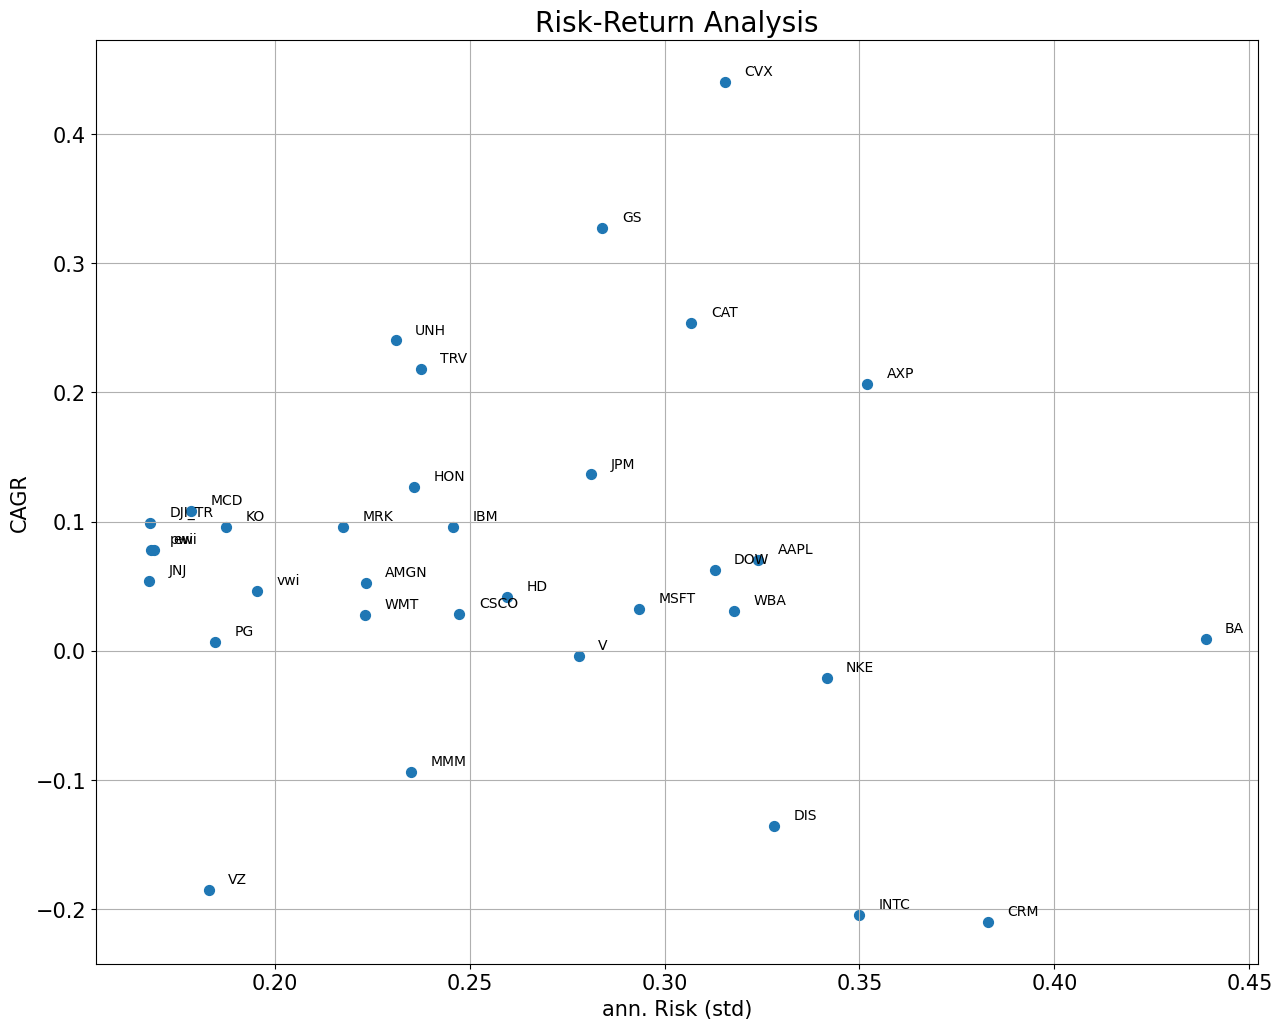

In [140]:
# And plot

# `x` axis: the annualize risk (std) of each instrument/index
# `y` axis: plot the Compund Annualize Growth Rate
summary.plot(kind = "scatter", x = "ann. Risk", y = "CAGR",
             figsize = (15,12),
             s = 50,
             fontsize = 15)

# Add the name of each instrument to the plot
for i in summary.index: # loop over the instruments name
    plt.annotate(i, # the name
                 
                 # plot the name on the xy axis with location of 0.005
                 # from the point.   
                 xy=(summary.loc[i, "ann. Risk"]+0.005,
                     summary.loc[i, "CAGR"]+0.005), size = 10)


plt.grid()
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk-Return Analysis", fontsize = 20)
plt.show()